# **Project: Sales Data Analysis & Visualization**

**Uploading CSV File**

In [6]:
from google.colab import files
uploaded = files.upload()


Saving SalesData.csv to SalesData.csv


**Data Cleaning Using Python**

In [7]:
import pandas as pd

# Load dataset
df = pd.read_csv("SalesData.csv")

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Remove duplicates (if any)
df.drop_duplicates(inplace=True)

# Remove "%" from 'Discount' column and convert to numeric
df['Discount'] = df['Discount'].str.replace('%', '').astype(float)

# Add a new column 'Revenue' (Sales after discount)
df['Revenue'] = df['Sales'] - (df['Sales'] * df['Discount'] / 100)
pd.set_option('display.expand_frame_repr', False)

print(df.head())  # Show first 5 rows


        Date       Product     Category    Sales  QuantitySold CustomerLocation   Profit  Discount  Unnamed: 8  Revenue
0 2024-01-01        Laptop  Electronics  75000.0           3.0           Mumbai  12000.0       5.0         NaN  71250.0
1 2024-02-01    Smartphone  Electronics  30000.0           5.0            Delhi   5000.0      10.0         NaN  27000.0
2 2024-03-01          Sofa    Furniture  15000.0           2.0        Bangalore   2500.0       8.0         NaN  13800.0
3 2024-04-01    Headphones  Electronics   5000.0           4.0          Chennai   1000.0       7.0         NaN   4650.0
4 2024-05-01  Dining Table    Furniture  20000.0           1.0             Pune   3500.0       5.0         NaN  19000.0


**Total Sales and Profit per Category**

This shows which category (Electronics, Furniture) generates the most revenue.

In [8]:
category_sales = df.groupby("Category")[["Sales", "Profit"]].sum()
print(category_sales)


                Sales   Profit
Category                      
Electronics  110000.0  18000.0
Furniture     35000.0   6000.0


**Top 5 Best-Selling Products**

This identify the highest-selling products

In [9]:
top_products = df.groupby("Product")[["Sales"]].sum().sort_values(by="Sales", ascending=False).head(5).reset_index()
print(top_products)



        Product    Sales
0        Laptop  75000.0
1    Smartphone  30000.0
2  Dining Table  20000.0
3          Sofa  15000.0
4    Headphones   5000.0


**Monthly Sales Trend**

This shows how sales change over time

In [10]:
df['Month'] = df['Date'].dt.strftime('%Y-%m')  # Extract month
monthly_sales = df.groupby("Month")["Sales"].sum().reset_index()
print(monthly_sales)


     Month    Sales
0  2024-01  75000.0
1  2024-02  30000.0
2  2024-03  15000.0
3  2024-04   5000.0
4  2024-05  20000.0


**Bar Chart for Best-Selling Products**

This creates a bar chart for best-selling products

<ipython-input-15-81ce472f7e8c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Product", y="Sales", data=df, palette="Blues")


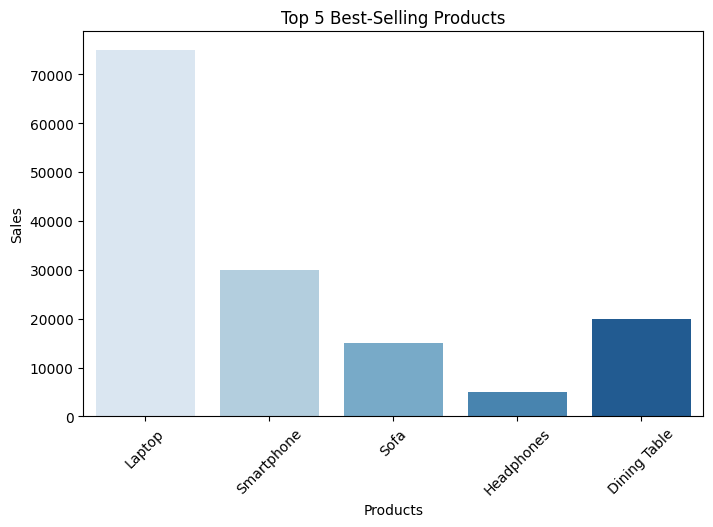

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x="Product", y="Sales", data=df, palette="Blues")
plt.title("Top 5 Best-Selling Products")
plt.xlabel("Products")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()



**Line Chart for Monthly Sales Trend**

This visualizes sales over time

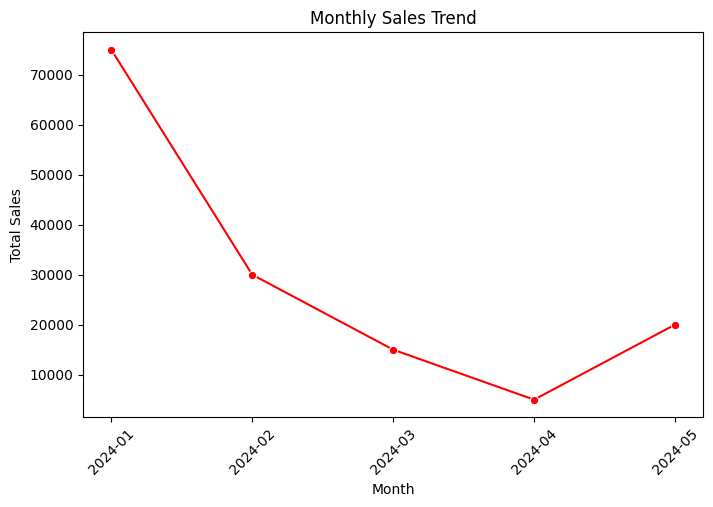

In [ ]:
plt.figure(figsize=(8,5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", color="red")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()
